<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 8
In this exercise, you will plot a time series of precipitation data for Arkansas from 1980 to 2013.

(1) Download the hourly precipitation data from NOAA https://www.ncdc.noaa.gov/cdo-web/search

(2) Resample data from hourly to monthly

(3) Subset data of 1980-1985 and 2008-2013 from original time series

(4) Plot the two time series data 


In [4]:
# This is the example code for your reference. You need to generate your own script.
# Import necessary packages 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [14]:
# read the data
# as I built the script in Colab, I need to mount my google drive
# You do not need to do this step, as you use the Anaconda Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive/')
# !!!Change the path for your data
file_path='/content/drive/My Drive/Colab Notebooks/AR_Precipitation_hourly.csv'

ar_precip_1980_2013 = pd.read_csv(file_path,
                                  # Make sure the dates import in datetime format
                                  parse_dates=['DATE'],
                                  # Set DATE as the index so you can subset data by time period
                                  index_col=['DATE'],
                                  # Mask no data values so they are not plotted / used in analysis
                                  na_values=['999.99'])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
# roughly check data
ar_precip_1980_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION            object
LATITUDE             object
LONGITUDE            object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [16]:
ar_precip_1980_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1980-01-01 01:00:00,COOP:035320,NORTH LITTLE ROCK AIRPORT AR US,171.6,34.83333,-92.26667,0.00,g,
1980-01-03 02:00:00,COOP:035320,NORTH LITTLE ROCK AIRPORT AR US,171.6,34.83333,-92.26667,0.01,,
1980-01-03 03:00:00,COOP:035320,NORTH LITTLE ROCK AIRPORT AR US,171.6,34.83333,-92.26667,0.01,,
1980-01-03 04:00:00,COOP:035320,NORTH LITTLE ROCK AIRPORT AR US,171.6,34.83333,-92.26667,0.01,,
1980-01-03 05:00:00,COOP:035320,NORTH LITTLE ROCK AIRPORT AR US,171.6,34.83333,-92.26667,0.02,,


In [17]:
# resample hourly data to monthly
ar_precip_1980_2013_monthly=ar_precip_1980_2013.resample('M').sum()

ar_precip_1980_2013_monthly

,HPCP
DATE,
1980-01-31,2.84
1980-02-29,1.26
1980-03-31,4.87
1980-04-30,7.50
1980-05-31,7.21
...,...
2013-08-31,5.36
2013-09-30,7.61
2013-10-31,7.01


In [18]:
# Subset data from 1980-01-31 to 1985-12-31 and 2008-01-31 to 2013-12-31
# Note, since the hourly data has been resampled to monthly data, 
# the date stampe for each month is the last day for that month, e.g., 01-31
ar_precip_1980_2013_monthly_8085=ar_precip_1980_2013_monthly['1980-01-31':'1985-12-31']
ar_precip_1980_2013_monthly_0812=ar_precip_1980_2013_monthly['2008-01-31':'2013-12-31']

ar_precip_1980_2013_monthly_8085.head()

,HPCP
DATE,
2008-01-31,4.53
2008-02-29,11.59
2008-03-31,26.16
2008-04-30,24.58
2008-05-31,13.04


In [19]:
ar_precip_1980_2013_monthly_0812.head()

,HPCP
DATE,
2008-01-31,4.53
2008-02-29,11.59
2008-03-31,26.16
2008-04-30,24.58
2008-05-31,13.04


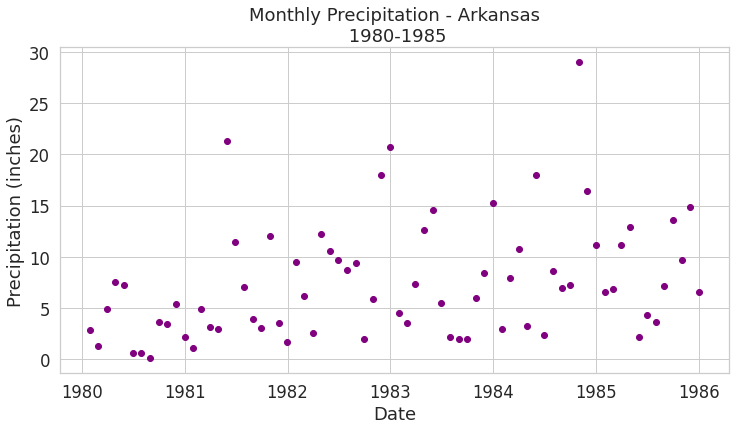

In [20]:
# Plot the first time series
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(ar_precip_1980_2013_monthly_8085.index.values,
           ar_precip_1980_2013_monthly_8085['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Arkansas\n 1980-1985")

plt.show()

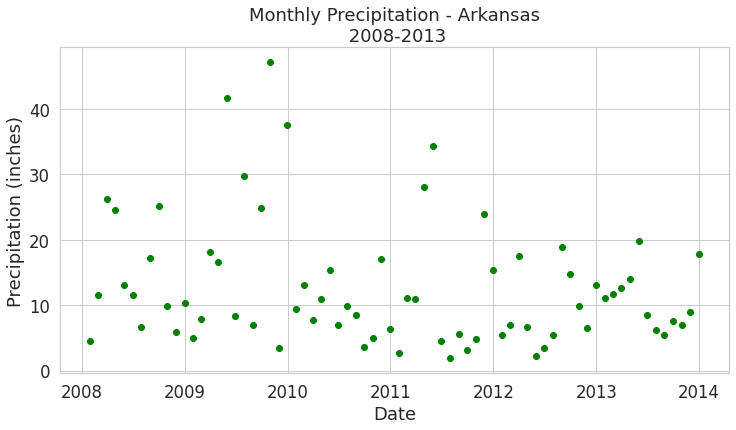

In [21]:
# Plot the first time series
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(ar_precip_1980_2013_monthly_0812.index.values,
           ar_precip_1980_2013_monthly_0812['HPCP'],
           color='green')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Arkansas\n 2008-2013")

plt.show()